In [3]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [4]:
nu = np.linspace(1e9, 200e9)

In [5]:
ElectronCharge = 4.803e-10
ElectronMass = 9.1094e-28
SpeedLight = 3e10

In [6]:
def plot_ql_approx(magField, thetaDeg, plasmaDens, ax=None):
    gyroFreq =  ElectronCharge * magField / (2 * np.pi * ElectronMass * SpeedLight)
    plasmaFreq = ElectronCharge * np.sqrt(plasmaDens / (np.pi * ElectronMass))
    theta = np.deg2rad(thetaDeg)
    approx = (nu**2 - plasmaFreq**2) / (nu * gyroFreq)
    limit = 0.5 * np.sin(theta)**2 / np.abs(np.cos(theta))
    if ax == None:
        plt.figure()
        plt.semilogx(nu, approx, label='approximation')
        plt.axhline(limit, color='r', label='limit')
        plt.semilogx(nu, approx / limit, label='ratio')
        plt.legend()
        plt.xlabel('Frequency [Hz]')
        plt.title(r'Validity of QL approximation for B=%.1f G,''\n'r'$\theta=$%.1f$\degree$ and $n_p$=%.1e cm$^{-3}$' % (magField, thetaDeg, plasmaDens))
    else:
        ax.semilogx(nu, approx, label='approximation')
        ax.axhline(limit, color='r', label='limit')
        ax.semilogx(nu, approx / limit, label='ratio')
        ax.set_xlabel('Frequency [Hz]')
        ax.set_title(r'Validity of QL approximation for B=%.1f G,''\n'r'$\theta=$%.1f$\degree$ and $n_p$=%.1e cm$^{-3}$' % (magField, thetaDeg, plasmaDens))
        
    

<IPython.core.display.Javascript object>


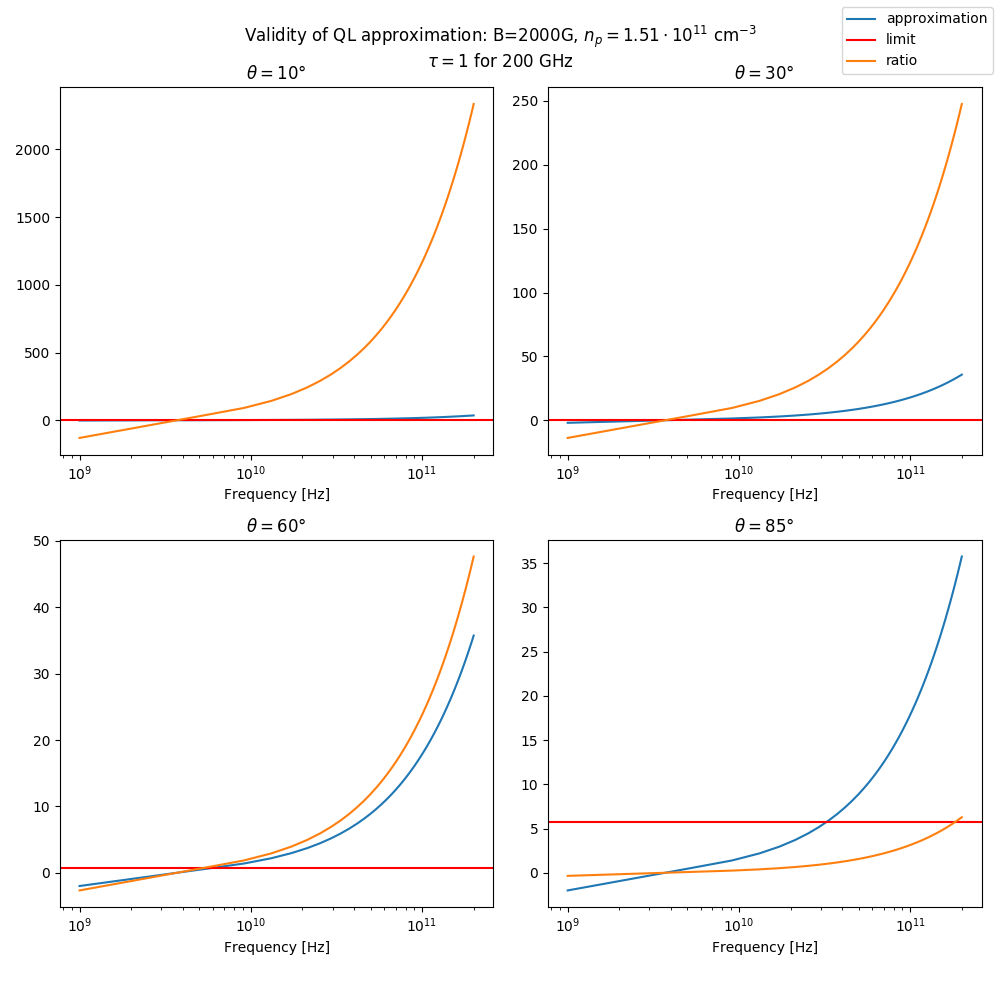

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plas = 1.51e11
plot_ql_approx(2000, 10, plas, ax=ax[0,0])
ax[0,0].set_title(r'$\theta=10\degree$')
plot_ql_approx(2000, 30, plas, ax=ax[0,1])
ax[0,1].set_title(r'$\theta=30\degree$')
plot_ql_approx(2000, 60, plas, ax=ax[1,0])
ax[1,0].set_title(r'$\theta=60\degree$')
plot_ql_approx(2000, 85, plas, ax=ax[1,1])
ax[1,1].set_title(r'$\theta=85\degree$')
lines = ax[0,0].get_lines()
fig.legend(lines, [l.get_label() for l in lines])
fig.suptitle('Validity of QL approximation: B=2000G, $n_p=1.51\cdot10^{11}$ cm$^{-3}$\n'r'$\tau=1$ for 200 GHz')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

<IPython.core.display.Javascript object>


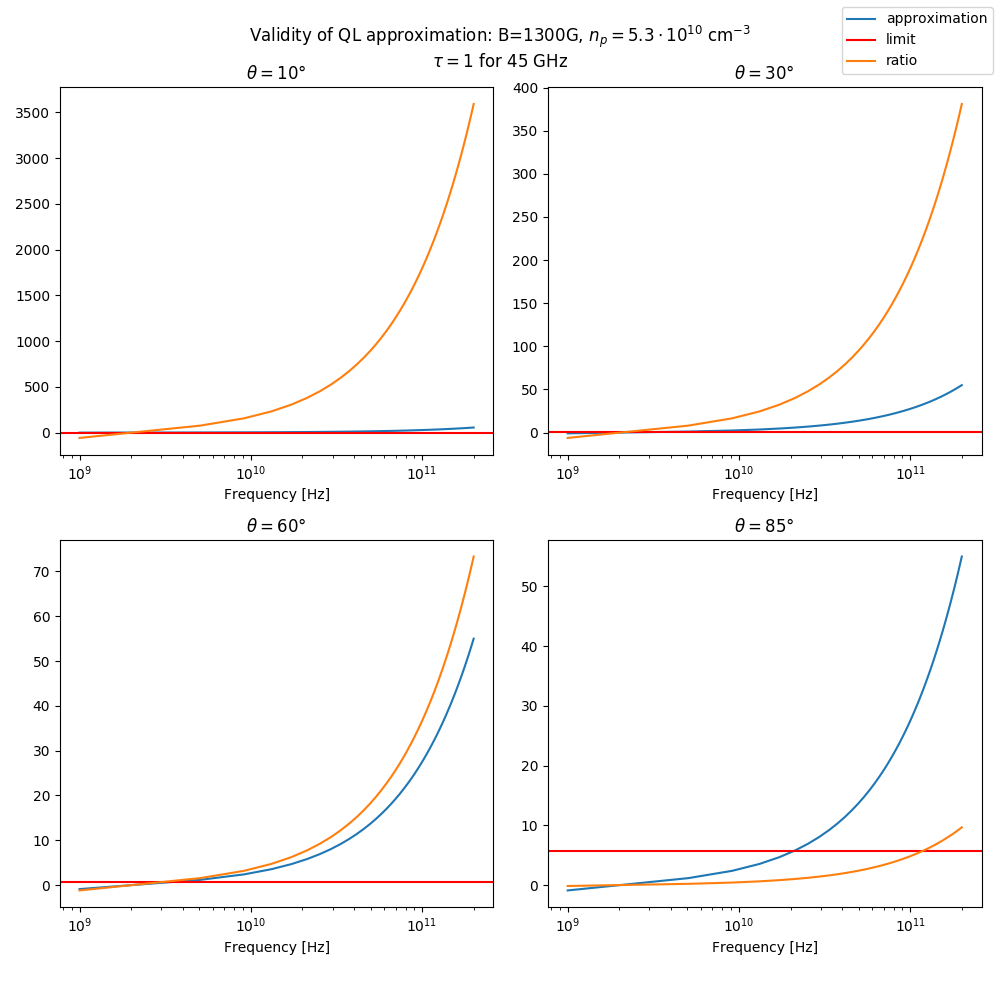

In [9]:
fig, ax = plt.subplots(2, 2, figsize=(10,10))
plas = 5.3e10
plot_ql_approx(1300, 10, plas, ax=ax[0,0])
ax[0,0].set_title(r'$\theta=10\degree$')
plot_ql_approx(1300, 30, plas, ax=ax[0,1])
ax[0,1].set_title(r'$\theta=30\degree$')
plot_ql_approx(1300, 60, plas, ax=ax[1,0])
ax[1,0].set_title(r'$\theta=60\degree$')
plot_ql_approx(1300, 85, plas, ax=ax[1,1])
ax[1,1].set_title(r'$\theta=85\degree$')
lines = ax[0,0].get_lines()
fig.legend(lines, [l.get_label() for l in lines])
fig.suptitle('Validity of QL approximation: B=1300G, $n_p=5.3\cdot10^{10}$ cm$^{-3}$\n'r'$\tau=1$ for 45 GHz')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

In [10]:
c7 = np.genfromtxt('c7_adj.csv', delimiter=',', skip_header=1)
height = c7[:,0]
temperature = c7[:,1]
plasmaDens = c7[:,2]
protonDens = c7[:,4]
def dulk_k(freq):
    lowT = 17.9 + np.log(temperature**1.5) - np.log(freq)
    highT = 24.5 + np.log(temperature) - np.log(freq)
    t1 = np.where(temperature < 2e5, lowT, highT)
    kDulk = 9.78e-3 * plasmaDens * protonDens / freq**2 / temperature**1.5 * t1;
    return kDulk

<IPython.core.display.Javascript object>


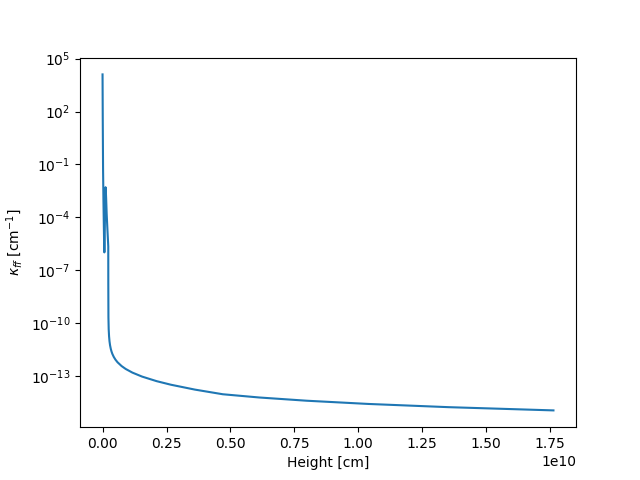

Text(0,0.5,'$\\kappa_{ff}$ [cm$^{-1}$]')

In [11]:
plt.figure()
plt.semilogy(height, dulk_k(10e9))
plt.xlabel('Height [cm]')
plt.ylabel('$\kappa_{ff}$ [cm$^{-1}$]')

In [13]:
def tau_eq_line(tauVal, freq):
    ds = height[1:] - height[:-1]
    tau = np.cumsum(dulk_k(freq)[-1:0:-1] * ds[::-1])
    return height[-(1 + np.argmax(tau > tauVal))]

<IPython.core.display.Javascript object>


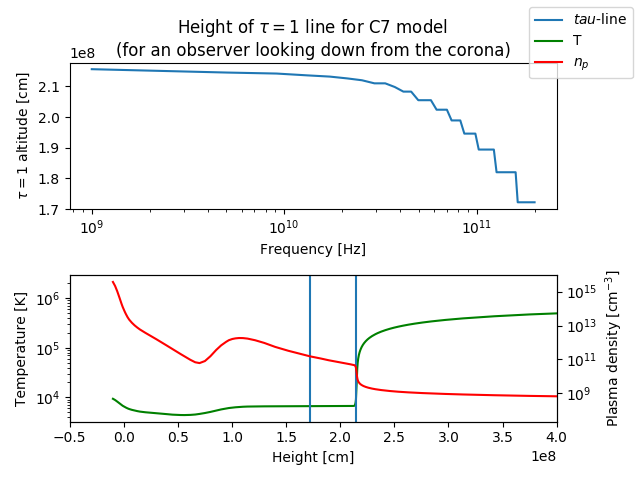

In [21]:
tauVal = 1
tauLine = []
for n in nu:
    tauLine.append(tau_eq_line(tauVal, n))
fig, ax = plt.subplots(2, 1)
ax[0].semilogx(nu, tauLine, label=r'$tau$-line')
ax[0].set_xlabel('Frequency [Hz]')
ax[0].set_ylabel(r'$\tau=1$ altitude [cm]')
ax[0].set_title(r'Height of $\tau=1$ line for C7 model ''\n''(for an observer looking down from the corona)')
dens = ax[1].twinx()
ax[1].semilogy(height, temperature, 'g', label='T')
ax[1].set_xlim(-5e7, 4e8)
dens.semilogy(height, plasmaDens, 'r', label='$n_p$')
dens.set_ylabel('Plasma density [cm$^{-3}$]')
ax[1].set_ylabel('Temperature [K]')
ax[1].set_xlabel('Height [cm]')
ax[1].axvline(tauLine[-1])
ax[1].axvline(tauLine[np.searchsorted(nu, 10e9)-1])
fig.legend()

fig.tight_layout()